# Lending Club - Case study

In [179]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [180]:
# Data gathering
file_loan = 'loan.csv'
loans_df = pd.read_csv(file_loan, low_memory=False, encoding='ISO-8859-1') # DtypeWarning: Columns (47) have mixed types. So low_memory=False

## Data Understanding

Observations from Dataset on rows and columns of dataframe are below. Code for data understanding as follows.

Fixing rows and columns.

Rows:
1. There are no summary rows.
2. There are no incorrect header or footer rows.
3. There are no extra rows.

Columns:
1. No column names are missing.
2. There are no abberviation/encoded column names.
3. There are no misaligned columns.
4. There are NA values in the dataset.
5. There are no empty strings in the dataset.
6. Can we add zip_code and addr_state ?

In [181]:
# To get the concise summary of the dataframe
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [182]:
# To get the dimensionality of the dataframe
loans_df.shape

(39717, 111)

In [183]:
# To get the columns and check for any abbreviations/encoded column names
for col in loans_df.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

In [184]:
# To check for any incorrect header rows
loans_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [185]:
# TO check for any incorrect footer rows
loans_df.tail(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
# To check for NAN/NA values exist in the dataframe
np.where(pd.isnull(loans_df))

(array([    0,     0,     0, ..., 39716, 39716, 39716], dtype=int64),
 array([ 10,  28,  29, ..., 108, 109, 110], dtype=int64))

In [187]:
# To check for empty strings exist in the dataframe
np.where(loans_df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))


## Data cleaning and manipulation


There are 111 columns in the dataset. Need to eliminate the unnecessary columns in the dataset. 

First we will check the missing values in each column.

In [188]:
# To check for disguised missing values present in each column.
loans_df.isna().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


As we know there are total 39717 rows in dataframe we can delete all the columns having 75% (29788) missing value count.

In [189]:
# To drop the columns having all NA values
loans_df.dropna(thresh=9929, axis=1, inplace=True) # thresh require that many non-NA values 39717-29788

In [190]:
loans_df.shape

(39717, 55)

After removing the columns with NA values there are total of 55 columns present now.

Observed there are columns with single unique values so we will find all those columns and drop them from analysis.

In [191]:
# To get the list of columns in the dataframe having only 1 unique value
for i in range(0,len(loans_df.columns)):
    if len(loans_df.iloc[:,i].unique()) == 1:
        print(loans_df.columns[i])

pymnt_plan
initial_list_status
policy_code
application_type
acc_now_delinq
delinq_amnt


In [192]:
# This line of code to drop columns should be executed only 1 time, multiple time execution causes KeyError,
#  as those columns are already deleted.

loans_df.drop(columns=['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', \
                       'acc_now_delinq', 'delinq_amnt'], axis=1, inplace=True)

In [193]:
loans_df.shape

(39717, 49)

In [194]:
loans_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [195]:
len(loans_df.url.unique())

39717

All the rows in the dataframe are having unique values and the url differs from other urls with respect to loan_id which is anyway available in id columns. So we can delete this column.

Next we have desc column which has long description provided by the borrower. We can't analyse anything from it as we are not looking for any sentiment of the context. So we will delete this column.

In the zip code column we could observe only partial value is given. Full value for the zip code is not available. So it is better to avoid this column for analysis.

We can delete the columns id and member_id as there are some unique identity values assigned by Lending club to loan and borrower. 

In [196]:
# This line of code to drop columns should be executed only 1 time, multiple time execution causes KeyError,
#  as those columns are already deleted.

loans_df.drop(columns=['url', 'desc', 'zip_code', 'id', 'member_id'], axis=1, inplace=True)

In [197]:
loans_df.shape

(39717, 44)

In [198]:
loans_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [199]:
loans_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,15000.00000,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,15000.00000,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,14400.00000,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,430.78000,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,82300.00000,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,18.60000,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.00000,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.00000,8.000000e+00
mths_since_last_delinq,14035.0,35.900962,22.020060,0.00,18.00,34.000000,52.00000,1.200000e+02
open_acc,39717.0,9.294408,4.400282,2.00,6.00,9.000000,12.00000,4.400000e+01


The columns collections_12_mths_ex_med, chargeoff_within_12_mnths and tax_liens are having zero value for descriptive statistics. Having those columns for analysis does not help so delete them. 

In [200]:
# This line of code to drop columns should be executed only 1 time, multiple time execution causes KeyError,
#  as those columns are already deleted.

loans_df.drop(columns=['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True)

In [201]:
loans_df.shape

(39717, 41)

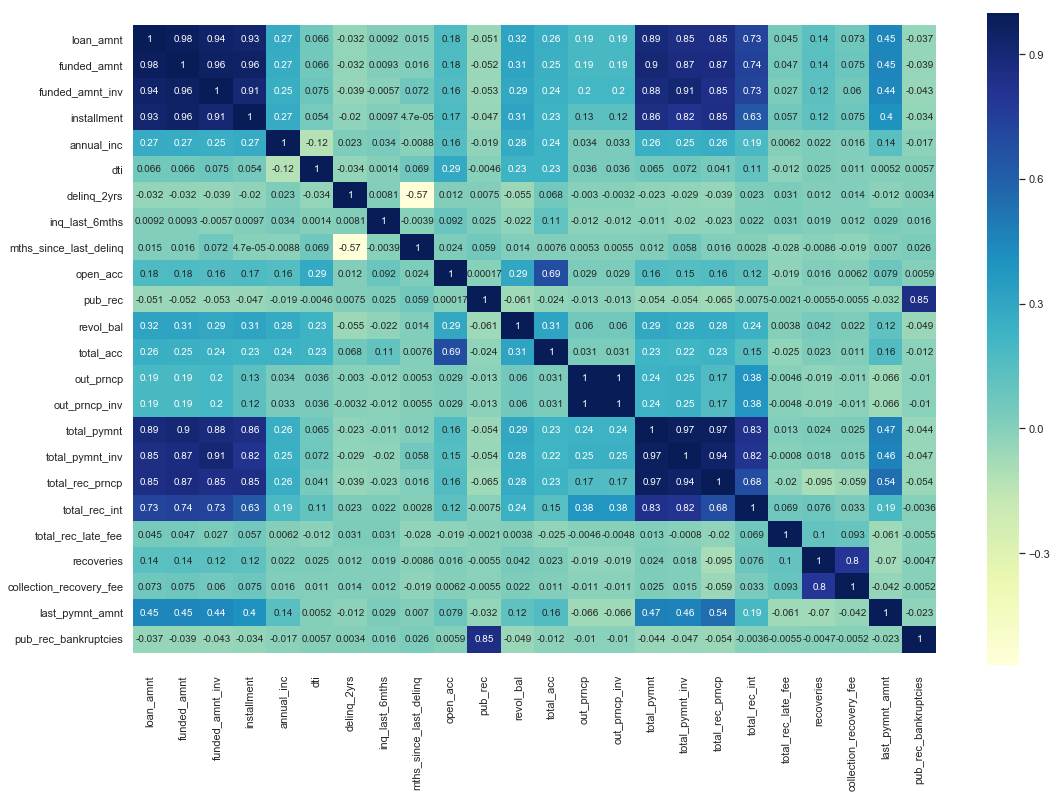

In [202]:
fig, ax = plt.subplots(figsize=(18, 12))
corr = loans_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, cmap="YlGnBu", annot=True)
bottom, top = plt.ylim()
bottom += 0.5 
top -= 0.5 
plt.ylim(bottom, top) 
plt.show() 

Observation from above heatmap of correlations between the variables:

1. loan_amnt has high correlation with funded_amnt, funded_amnt_inv and installment. So we can drop these 3 columns.
2. total_pymnt has high correlation with total_pymnt_inv and total_rec_prncp. So we can drop these 2 columns.
3. out_prncp and out_prncp_inv have correlation 1 so we can delete 1 column.

In [203]:
# This line of code to drop columns should be executed only 1 time, multiple time execution causes KeyError,
#  as those columns are already deleted.

loans_df.drop(columns=['funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt_inv', \
                       'total_rec_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [204]:
loans_df.shape

(39717, 35)

In [205]:
# To drop the rows having all NA values
loans_df.dropna(thresh=1, axis=0, inplace=True)

In [206]:
loans_df.shape

(39717, 35)

In [207]:
loans_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Observed there are 3 columns containing amount having precision value greater than 2 decimals. So we will round off to 2 decimal value. 

Those columns are :   
total_pymnt   
total_rec_late_fee   
collection_recovery_fee

In [208]:
# To round of column values to 2 decimal places
loans_df['total_pymnt'] = loans_df['total_pymnt'].apply(lambda val:round(val,2))
loans_df['total_rec_late_fee'] = loans_df['total_rec_late_fee'].apply(lambda val:round(val,2))
loans_df['collection_recovery_fee'] = loans_df['collection_recovery_fee'].apply(lambda val:round(val,2))

In [209]:
loans_df.shape

(39717, 35)

Converting to datetime type for the date columns 

In [210]:
# Converting columns having date value to datetime format.
loans_df['last_credit_pull_d'] = pd.to_datetime(loans_df['last_credit_pull_d'], format='%b-%y')
loans_df['issue_d'] = pd.to_datetime(loans_df['issue_d'], format='%b-%y')
loans_df['last_pymnt_d'] = pd.to_datetime(loans_df['last_pymnt_d'], format='%b-%y')
loans_df['earliest_cr_line'] = pd.to_datetime(loans_df['earliest_cr_line'], format='%b-%y')

There are 2 columns having % in the column value for int_rate and revol_util. It would be easier to analyze if we remove the % sign from the value.

In [211]:
# To remove the % character from the values of 2 columns
loans_df.int_rate = loans_df.int_rate.str.strip('%').astype('float')
loans_df.revol_util = loans_df.revol_util.str.strip('%').astype('float')

In [212]:
loans_df['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [213]:
# To remove 'months' characters from the term column
loans_df['terms'] = loans_df['term'].str[1:3]
loans_df['terms'].astype(str).astype(int)

0        36
1        60
2        36
3        36
4        60
5        36
6        60
7        36
8        60
9        60
10       60
11       36
12       36
13       36
14       36
15       36
16       36
17       36
18       36
19       36
20       60
21       36
22       36
23       36
24       36
25       36
26       36
27       60
28       36
29       36
         ..
39687    36
39688    36
39689    36
39690    36
39691    36
39692    36
39693    36
39694    36
39695    36
39696    36
39697    36
39698    36
39699    36
39700    36
39701    36
39702    36
39703    36
39704    36
39705    36
39706    36
39707    36
39708    36
39709    36
39710    36
39711    36
39712    36
39713    36
39714    36
39715    36
39716    36
Name: terms, Length: 39717, dtype: int32

In [214]:
# To drop term column. This has to be executed only once.
del loans_df['term']

## Data Analysis

For all the applicants who applied for the loan, either the loan will be accepted or rejected by the company. In our dataset 
we have the transactional history of the applicants whose loan has been approved. The loan can be in 3 different status namely
Fully Paid, Current and Charged Off. 

Here we need to find the risky loan applicants to cut down the amount of credit loss. Let's first see what percentage of amount
loss for the company.

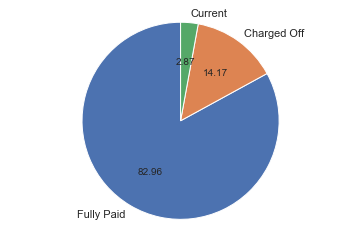

In [215]:
# To view the percentage of loan status
loans_status_df = loans_df[['loan_status']].copy()

loan_status = 'Fully Paid', 'Charged Off', 'Current'
fig, ax = plt.subplots()
ax.pie(loans_status_df['loan_status'].value_counts(), labels=loan_status, autopct='%1.2f', startangle=90)
ax.axis('equal')
plt.show()

We could observe that 14.17% of the loans are defaulted and 82.96% of the loans are full paid by the borrower.

In the loan_status we have 3 status' mentioned. Among those status we cannot conclude that Current status borrower whether the
loan will be defaulted or fully paid. So we can ignore the rows having the Current status.

In [216]:
# To remove the current status records from the dataframe
loan_df = loans_df.copy()
status = ['Fully Paid', 'Charged Off']
loan_df = loan_df.loc[loan_df['loan_status'].isin(status) ]

In [217]:
# To transform the loan status to 0 and 1.
transform = {'Fully Paid': 0, 'Charged Off': 1}
loan_df['loan_status'] = loan_df['loan_status'].map(transform)

In [218]:
loan_df.shape

(38577, 35)

In [219]:
loans_df.columns

Index(['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'terms'],
      dtype='object')

### Univariate and Segmented univariate analysis

In [220]:
# To check the information about the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
loan_amnt                  38577 non-null int64
int_rate                   38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null datetime64[ns]
loan_status                38577 non-null int64
purpose                    38577 non-null object
title                      38566 non-null object
addr_state                 38577 non-null object
dti                        38577 non-null float64
delinq_2yrs                38577 non-null int64
earliest_cr_line           38577 non-null datetime64[ns]
inq_last_6mths             38577 non-null 

In [221]:
#Check  for unique count of variable in the filtered dataset
for col in loan_df.columns:
    print(col , loan_df[col].nunique())

loan_amnt 870
int_rate 370
grade 7
sub_grade 35
emp_title 28027
emp_length 11
home_ownership 5
annual_inc 5215
verification_status 3
issue_d 55
loan_status 2
purpose 14
title 19297
addr_state 50
dti 2853
delinq_2yrs 11
earliest_cr_line 524
inq_last_6mths 9
mths_since_last_delinq 95
open_acc 40
pub_rec 5
revol_bal 21275
revol_util 1088
total_acc 82
out_prncp 1
total_pymnt 35462
total_rec_int 34025
total_rec_late_fee 781
recoveries 4040
collection_recovery_fee 2117
last_pymnt_d 101
last_pymnt_amnt 34418
last_credit_pull_d 106
pub_rec_bankruptcies 3
terms 2


  grade  loan_status
1     B         1425
2     C         1347
3     D         1118
4     E          715
0     A          602


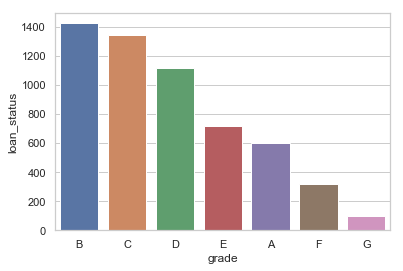

In [222]:
## segment analysis for grade

loan_df_grade = loans_df[loans_df['loan_status']=='Charged Off'].groupby("grade", as_index=False)
loan_df_grade2= loan_df_grade["loan_status"].count().sort_values(by='loan_status', ascending=False)
print(loan_df_grade2.head())
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="grade", y="loan_status", data=loan_df_grade2)

##### Highest number of loan default are for people belonging to grade B and second highest loan default is for grade C.

  home_ownership  loan_status
3           RENT         2839
0       MORTGAGE         2327
2            OWN          443
1          OTHER           18


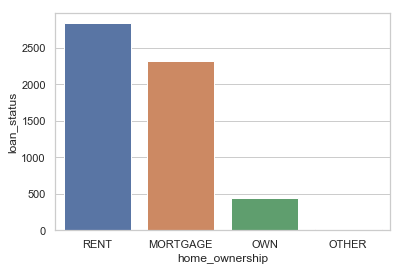

In [223]:
# segment analysis for home_ownership
#loan_df["home_ownership"]

loan_df_home_ownership = loans_df[loans_df['loan_status']=='Charged Off'].groupby("home_ownership", as_index=False)
loan_df_home_ownership2= loan_df_home_ownership["loan_status"].count().sort_values(by='loan_status', ascending=False)
print(loan_df_home_ownership2.head())
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="home_ownership", y="loan_status", data=loan_df_home_ownership2)

##### Maximum  number of loan default  is for customer with rent home ownership and second highest loan default is for mortgage home ownership.

    annual_income_range  count
0    (2834.08, 66376.0]   3832
1   (66376.0, 128672.0]   1511
2  (128672.0, 190968.0]    208
3  (190968.0, 253264.0]     45
4  (253264.0, 315560.0]     11


[None]

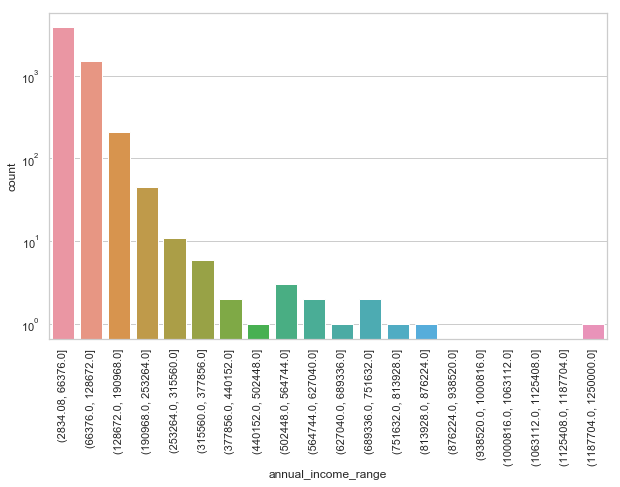

In [224]:
#Annual income distribution

df_anual_inc = pd.cut(loans_df[loans_df['loan_status']=='Charged Off']["annual_inc"], bins=20,duplicates='drop').value_counts()
df_anual_inc = df_anual_inc.reset_index()
df_anual_inc1 = pd.DataFrame(df_anual_inc)

df_anual_inc1.columns=["annual_income_range","count"]
print(df_anual_inc1.head())

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="annual_income_range", y="count", data=df_anual_inc1)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
ax.set(yscale="log")

##### Highest loan default belongs to the customer with annual income in the range [2834.08, 253264.0].

Now we  will do univariate analysis by taking loan_amnt column. We will check for any outliers in the dataset for this column.

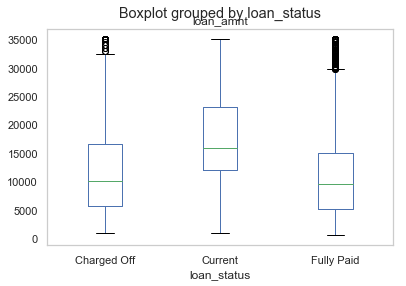

In [225]:
# To draw a boxplot to see if there are any outliers in loan amount
loans_df.boxplot(by ='loan_status', column =['loan_amnt'], grid = False)
plt.show()

There are few outliers for the Charged Off and Fully Paid loans. There is no much impact as the range of outliers is very minimal.

In [226]:
# To filter the dataframes based on loan_status
loans_chargedoff = loans_df.loc[loans_df['loan_status']=='Charged Off'].copy()
loans_paid = loans_df.loc[loans_df['loan_status']=='Fully Paid'].copy()

In [227]:
# To bin the loan amount with a range of 5000 interval
bins = [500, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
s1 = pd.cut(loans_chargedoff['loan_amnt'], bins=bins).value_counts()
s2 = pd.cut(loans_paid['loan_amnt'], bins=bins).value_counts()

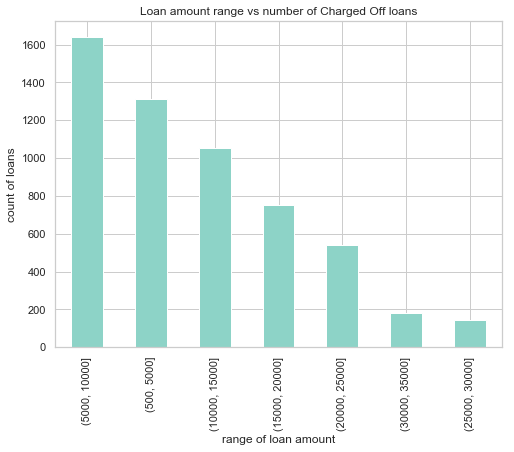

In [228]:
# To view the distribution of loan amount 
f, ax = plt.subplots(figsize=(8, 6))
s1.plot.bar(colormap='Set3')
ax.set_title('Loan amount range vs number of Charged Off loans')
ax.set_xlabel('range of loan amount')
ax.set_ylabel('count of loans')
plt.show()

#### Majority of the defaulted loans requested are below 15000 to 20000. 

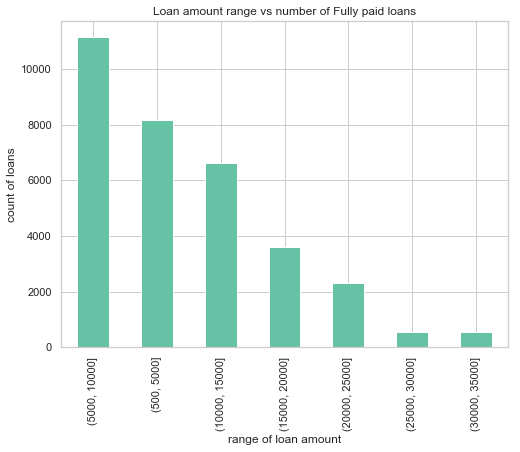

In [229]:
f, ax = plt.subplots(figsize=(8, 6))
s2.plot.bar(colormap='Set2')
ax.set_title('Loan amount range vs number of Fully paid loans')
ax.set_xlabel('range of loan amount')
ax.set_ylabel('count of loans')
plt.show()

For fully paid loans also the number of loans taken are below 15000.

We will look in term column for analysis.

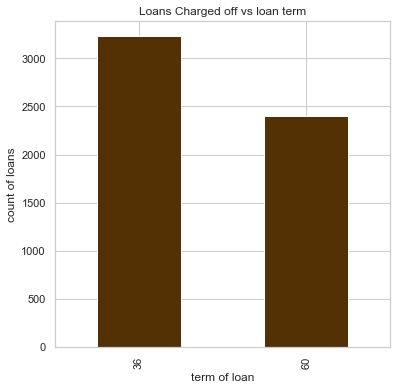

In [230]:
# To plot the charged off loans with term
f, ax = plt.subplots(figsize=(6,6))
loans_chargedoff['terms'].value_counts().plot.bar(colormap='BrBG')
ax.set_title('Loans Charged off vs loan term')
ax.set_xlabel('term of loan')
ax.set_ylabel('count of loans')
plt.show()

#### Observation more number of loans with 36 months term are defaulted than 60 months term.

We will now look into purpose column for univariate analysis

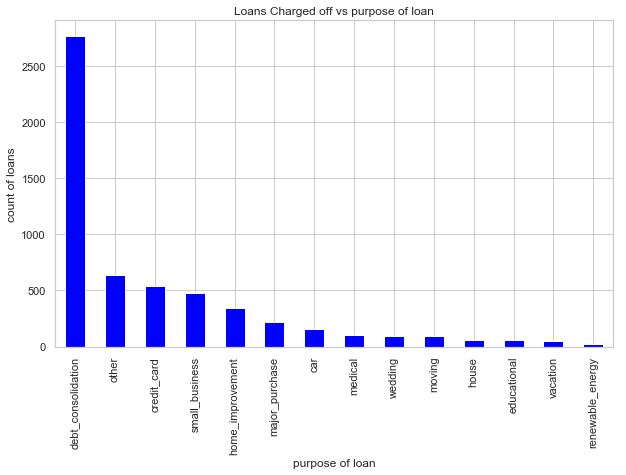

In [231]:
# To plot the charged off loans with term
f, ax = plt.subplots(figsize=(10,6))
loans_chargedoff['purpose'].value_counts().plot(kind='bar', stacked=True, colormap='winter')
ax.set_title('Loans Charged off vs purpose of loan')
ax.set_xlabel('purpose of loan')
ax.set_ylabel('count of loans')
plt.show()

#### Loans requested with debt_consolidation will have higher chances of default.

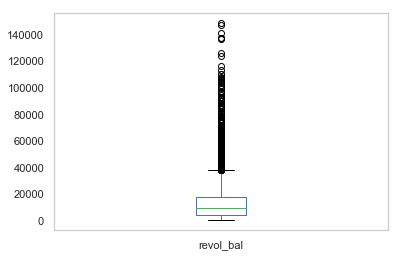

In [232]:
# To draw a boxplot to see if there are any outliers in revol_bal
loans_chargedoff.boxplot( column =['revol_bal'], grid = False)
plt.show()

Could observe there are many outliers for revol_bal column for the Fully Paid and Charged Off customers.

In [233]:
Q1 = loans_chargedoff.revol_bal.quantile(0.25)
Q3 = loans_chargedoff.revol_bal.quantile(0.75)
IQR = Q3 - Q1

In [234]:
loans_chargedoff.revol_bal = loans_chargedoff.revol_bal[~((loans_chargedoff.revol_bal < (Q1 - 1.5 * IQR)) |(loans_chargedoff.revol_bal > (Q3 + 1.5 * IQR)))]

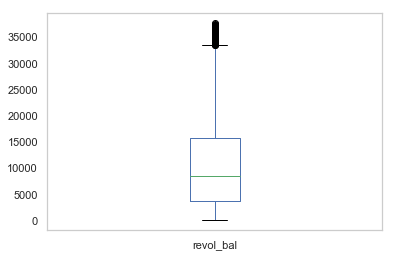

In [235]:
# To draw a boxplot after removing majority of the outliers
loans_chargedoff.boxplot( column =['revol_bal'], grid = False)
plt.show()

In [236]:
loans_chargedoff.revol_bal = loans_chargedoff.revol_bal.apply(np.sqrt)

In [237]:
loans_chargedoff.revol_bal.describe()

count    5280.000000
mean       92.552442
std        45.087252
min         0.000000
25%        60.938493
50%        92.184596
75%       125.079974
max       194.229246
Name: revol_bal, dtype: float64

In [238]:
## Binning revolving balance 
## Relation between loan charged off  and revolving balance
revol_bal = pd.cut(loans_chargedoff.revol_bal, bins=10).value_counts()
revol_bal = revol_bal.reset_index()
df_revol_bal = pd.DataFrame(revol_bal)
df_revol_bal.columns=["revol_bal_range","count"]
df_revol_bal

,revol_bal_range,count
0,"(77.692, 97.115]",859
1,"(97.115, 116.538]",799
2,"(58.269, 77.692]",762
3,"(116.538, 135.96]",668
4,"(38.846, 58.269]",562
5,"(135.96, 155.383]",470
6,"(19.423, 38.846]",382
7,"(-0.194, 19.423]",297
8,"(155.383, 174.806]",290
9,"(174.806, 194.229]",191


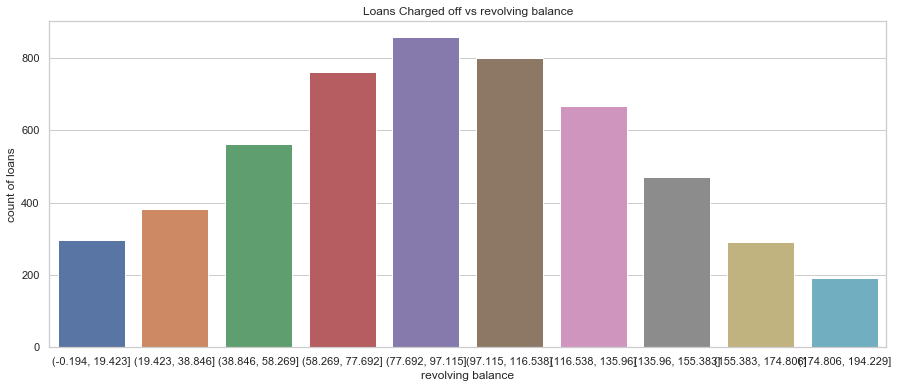

In [239]:
# To plot the charged off loans with revol_bal
f, ax = plt.subplots(figsize=(15,6))
sns.barplot(x="revol_bal_range", y="count", data=df_revol_bal)
ax.set_title('Loans Charged off vs revolving balance')
ax.set_xlabel('revolving balance')
ax.set_ylabel('count of loans')
plt.show()

##### Total credit with revolving balance with range 190 to 260 has the highest chances of default.

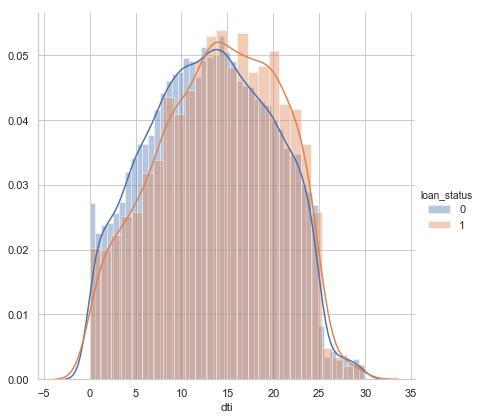

In [240]:
# To see the dti column distribution
sns.FacetGrid(loan_df, hue= "loan_status", height=6).map(sns.distplot, "dti" ).add_legend()
plt.show()

Here 1 represents Charged Off and 0 as Fully paid loans

##### Observed values having 12-17 having highest chance of default.

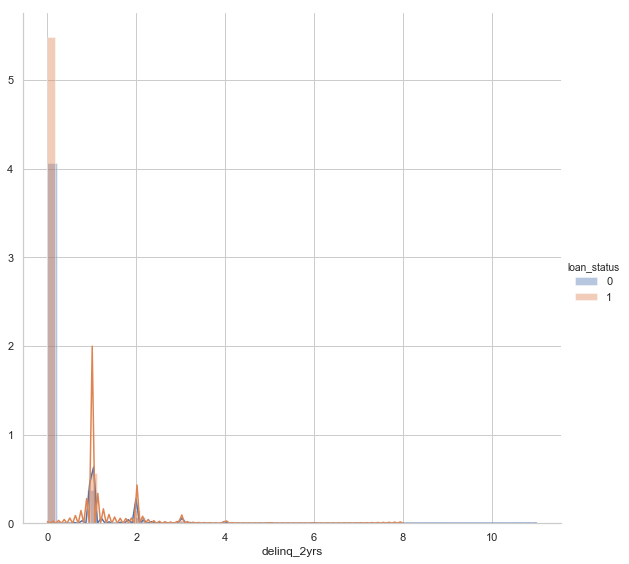

In [241]:
# To see the delinq_2yrs column distribution
sns.FacetGrid(loan_df, hue= "loan_status", height=8).map(sns.distplot, "delinq_2yrs" ).add_legend()
plt.show()

##### Loans with delinq_2yrs with 0-2 value have the highest number of defaults.


## Bivariate Analysis

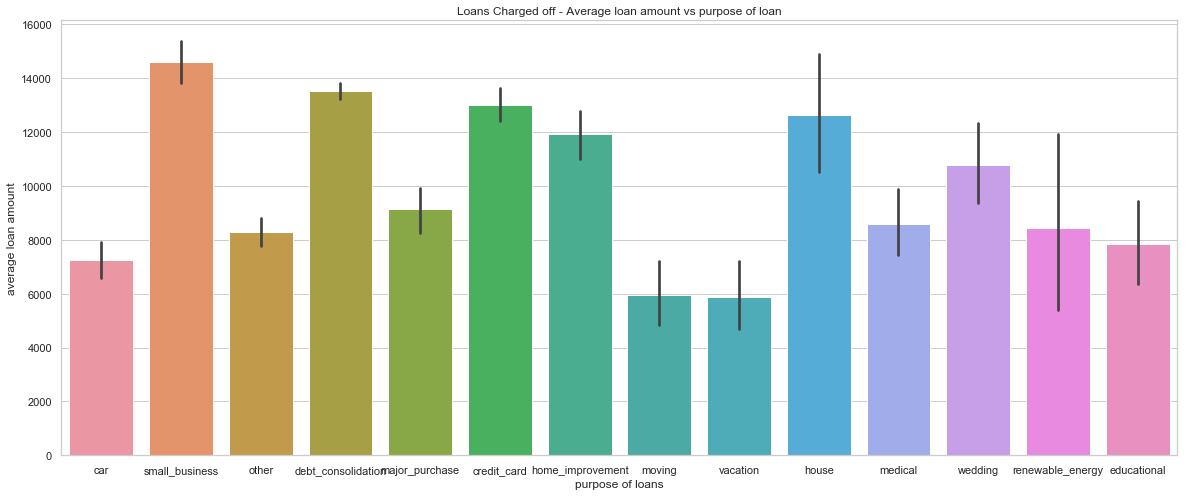

In [242]:
# To analyse the loan amount and interest rate with respect to the charged off loans.
f, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='purpose', y='loan_amnt', data=loans_chargedoff, estimator=np.mean)
ax.set_title('Loans Charged off - Average loan amount vs purpose of loan')
ax.set_xlabel('purpose of loans')
ax.set_ylabel('average loan amount')
plt.show()

#### The loans with purpose of small business, debt_consolidation having higher chances of loan default. 

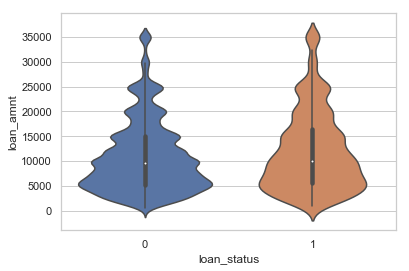

In [243]:
# To plot violin plot of loan amount with respect to loan status
sns.violinplot(x="loan_status", y="loan_amnt", data=loan_df, size=8)
plt.show()

Here 1 represents Charged Off and 0 as Fully paid loans

#### Observed the loan amount near by 5000 are more likely to get defaulted.

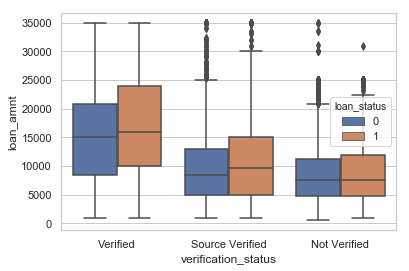

In [244]:
# compare the verfication status with loan_amount
sns.boxplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df)
plt.show()

#### Observed the loans with verified status are having high chances of default.

In [245]:
loan_df_corr = loan_df.copy()
del loan_df_corr['out_prncp']

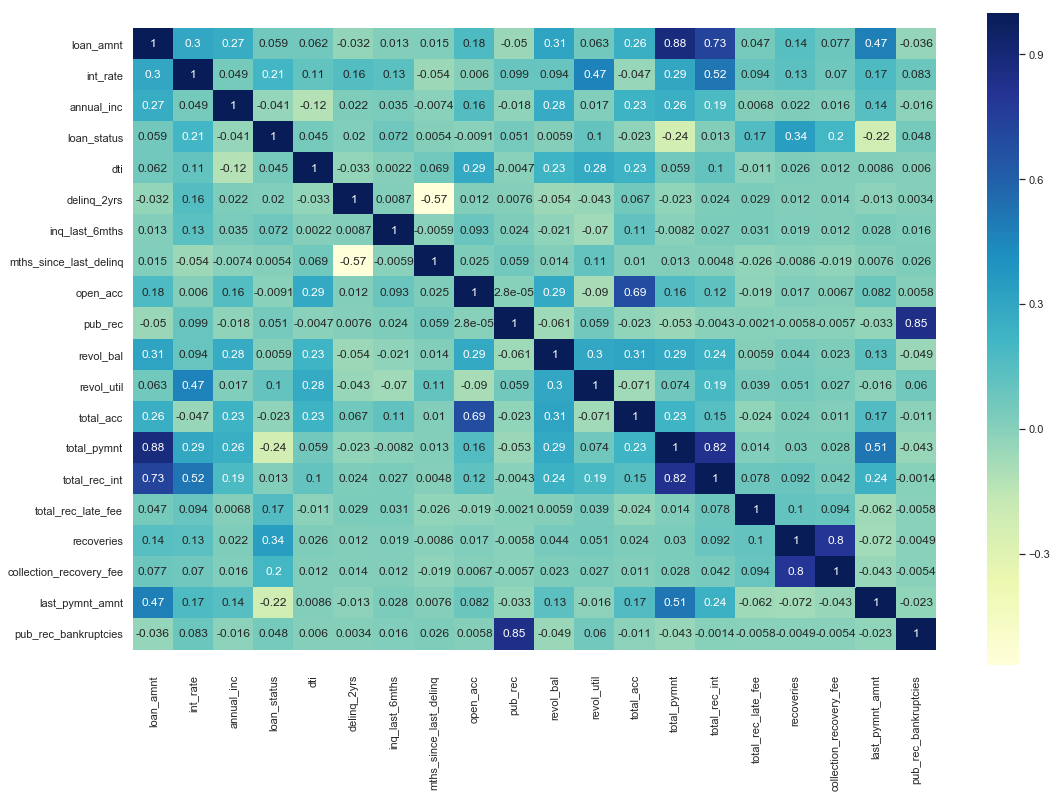

In [246]:
# To draw the correlation matrix of the loan dataset.

fig, ax = plt.subplots(figsize=(18, 12))
corr = loan_df_corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, cmap="YlGnBu", annot=True)
bottom, top = plt.ylim()
bottom += 0.5 
top -= 0.5 
plt.ylim(bottom, top) 
plt.show() 

Observations :            
    1.  Loan amount is correlated with total payment and total_rec_int.      
    2.  Recoveries are highly correlated with collection recovery fee.         
    3.  Derogatory public records are correlated with number of public record bankruptcies.
    

In [247]:
loan_df_amnt = loan_df.copy()
Q1 = loan_df_amnt.loan_amnt.quantile(0.25)
Q3 = loan_df_amnt.loan_amnt.quantile(0.75)
IQR = Q3 - Q1
loan_df_amnt.loan_amnt = loan_df_amnt.loan_amnt[~((loan_df_amnt.loan_amnt < (Q1 - 1.5 * IQR)) |(loan_df_amnt.loan_amnt > (Q3 + 1.5 * IQR)))]

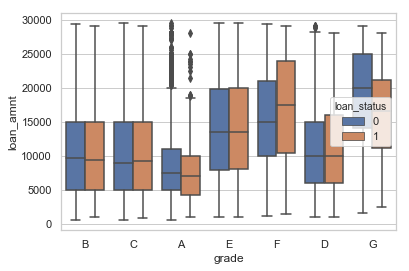

In [248]:
# compare the loan amount with grade
sns.boxplot(x='grade', y='loan_amnt', hue="loan_status", data=loan_df_amnt)
plt.show()

#### Observed loans with grade F are having high chance of default followed by G grade with respect to loan amount and grade

In [249]:
loan_df_inc = loan_df.copy()
Q1 = loan_df_inc.annual_inc.quantile(0.25)
Q3 = loan_df_inc.annual_inc.quantile(0.75)
IQR = Q3 - Q1
loan_df_inc.annual_inc = loan_df_inc.annual_inc[~((loan_df_inc.annual_inc < (Q1 - 1.5 * IQR)) |(loan_df_inc.annual_inc > (Q3 + 1.5 * IQR)))]

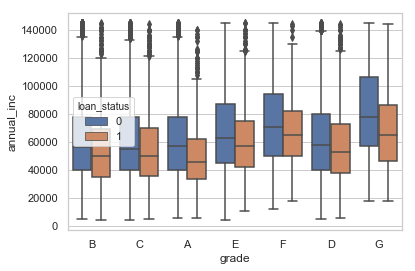

In [250]:
# To compare the annual income with grade
#sns.violinplot(x="grade", y="loan_amnt", data=loan_df_inc, size=8)
sns.boxplot(x='grade', y='annual_inc', hue="loan_status", data=loan_df_inc)
plt.show()

##### Observed borrowers having annual income with grade G are having high chances of default.

C:\Users\nisinha\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


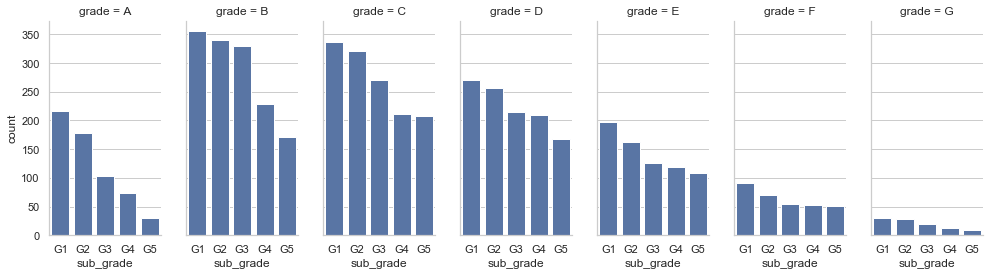

In [251]:
loan_df_grade_groupby = loans_df[loans_df['loan_status']=='Charged Off'].groupby(["grade","sub_grade"]).agg('size').rename('count').reset_index()
loan_df_grade_groupby_count = loan_df_grade_groupby.sort_values(by="count",ascending=False)
loan_df_grade_groupby_count
g = sns.FacetGrid(loan_df_grade_groupby_count, col="grade", height=4, aspect=.5, col_order = ["A","B","C","D","E","F","G"])
g.map(sns.barplot, "sub_grade", "count");

##### Customers belonging to grade B and subgrade G1,G2   have high chance of loan default

C:\Users\nisinha\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


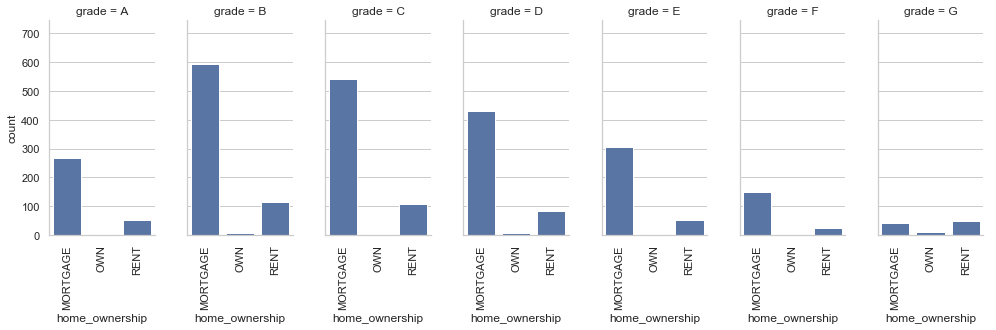

In [252]:
loan_df_grade_groupby_home_ownership = loans_df[loans_df['loan_status']=='Charged Off'].groupby(["grade","home_ownership"]).agg('size').rename('count').reset_index()
loan_df_grade_groupby_home_ownership.sort_values(by="count",ascending=False)
g = sns.FacetGrid(loan_df_grade_groupby_home_ownership, col="grade", height=4, aspect=.5,col_order = ["A","B","C","D","E","F","G"])
g.map(sns.barplot, "home_ownership", "count");
g.set_xticklabels(rotation = 90)



##### Customers of GradeB with  home ownership as mortgage have high chance of   loan default